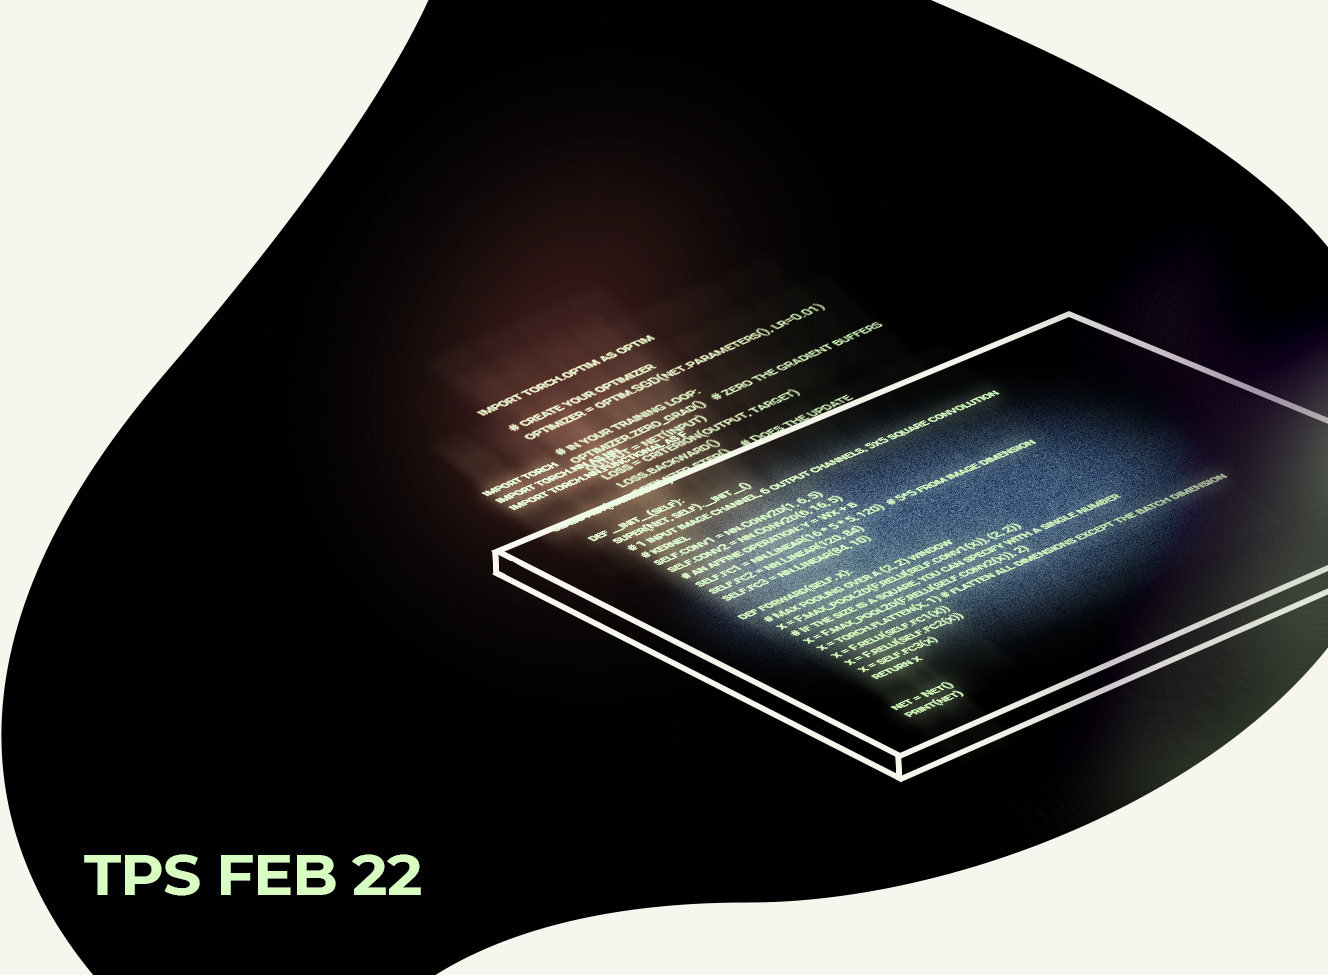

____
# **<span style="color:#aec983;"> Table of Content </span>**
<a id="table-of-contents"></a>
- [1. Introduction](#1)
- [2. Dataset Overview](#2) 
    - [2.1. Train Overview](#2.1)
    - [2.1. Test Overview](#2.2)
- [3. Target overview](#3) 
- [4. Train and Test unique value](#4) 
- [5. Features Distribution](#5) 
- [6. Features Correalation](#6) 
    - [6.1 Train](#6.1) 
    - [6.2 Test](#6.2) 
- [7. Segments Visualisation](#7) 
- [8. PCA](#8) 

____

[back to top](#table-of-contents)
<a id="1"></a>
# **<span style="color:#aec983;">1. Introduction</span>**
For this challenge, you will be predicting bacteria species based on repeated lossy measurements of DNA snippets. Snippets of length 10 are analyzed using Raman spectroscopy that calculates the histogram of bases in the snippet. In other words, the DNA segment $\text{ATATGGCCTT}$ becomes $\text{A}_{2} \text{T}_{4} \text{G}_{2} \text{C}_{2}$  

Each row of data contains _a spectrum of histograms_ generated by repeated measurements of a sample, each row containing the output of all 286 histogram possibilities (e.g.,$\text{A}_0 \text{T}_0 \text{G}_0 \text{C}_0 $ to $\text{A}_{10} \text{T}_0 \text{G}_0 \text{C}_0 $), which then has a bias spectrum (of totally random ATGC) subtracted from the results.  

The data (both train and test) also contains simulated measurement errors (of varying rates) for many of the samples, which makes the problem more challenging.  

__Files__  

`train.csv` - the training set, which contains the spectrum of 10-mer histograms for each sample
* `A0..10T0...` - Histograms [Raman spectroscopy](https://en.wikipedia.org/wiki/Raman_spectroscopy)
* `target` 
    * `Streptococcus_pyogenes` - [Streptococcus_pyogenes](https://en.wikipedia.org/wiki/Streptococcus_pyogenes)
    * `Salmonella_enterica` - [Salmonella_enterica](https://ru.wikipedia.org/wiki/Salmonella_enterica)
    * `Enterococcus_hirae` - [Enterococcus_hirae](https://en.wikipedia.org/wiki/Enterococcus_hirae)
    * `Escherichia_coli` - [Escherichia_coli](https://en.wikipedia.org/wiki/Escherichia_coli)
    * `Campylobacter_jejuni` - [Campylobacter_jejuni](https://en.wikipedia.org/wiki/Campylobacter_jejuni)
    * `Streptococcus_pneumoniae` - [Streptococcus_pneumoniae](https://en.wikipedia.org/wiki/Streptococcus_pneumoniae)
    * `Staphylococcus_aureus` - [Staphylococcus_aureus](https://en.wikipedia.org/wiki/Staphylococcus_aureus)
    * `Escherichia_fergusonii` - [Escherichia_fergusonii](https://en.wikipedia.org/wiki/Escherichia_fergusonii)
    * `Bacteroides_fragilis` - [Bacteroides_fragilis](https://en.wikipedia.org/wiki/Bacteroides_fragilis)
    * `Klebsiella_pneumoniae` - [Klebsiella_pneumoniae](https://en.wikipedia.org/wiki/Klebsiella_pneumoniae)



In [ ]:
#--------------------------- Import Packages ------------------------------
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
#--------------------------- Read CSV ------------------------------
train_df = pd.read_csv('../input/tabular-playground-series-feb-2022/train.csv')
test_df = pd.read_csv('../input/tabular-playground-series-feb-2022/test.csv')
ssub = pd.read_csv('../input/tabular-playground-series-feb-2022/sample_submission.csv')

#--------------------------- Preparation  ------------------------------
FEATURES = [col for col in train_df.columns if col not in ['row_id', 'target']]
train_unique_val_df = pd.DataFrame([len(train_df[col].unique()) for col in FEATURES], index=FEATURES, columns=['unique'])
test_unique_val_df = pd.DataFrame([len(test_df[col].unique()) for col in FEATURES], index=FEATURES, columns=['unique'])
unique_value_feature_diff = train_df['target'].value_counts()


[back to top](#table-of-contents)
<a id="2"></a>
# **<span style="color:#aec983;">2. Dataset overview </span>**

<a id="2.1"></a>
## **<span style="color:#aec983;">2.1 Train overview </span>**

In [ ]:
train_df.head(3)

In [ ]:
print(f'Number of rows: {train_df.shape[0]};  Number of columns: {train_df.shape[1]}; No of missing values: {sum(train_df.isna().sum())}')

In [ ]:
train_df.dtypes

In [ ]:
train_df.describe()

In [ ]:
print('Target column basic statistics:')
train_df['target'].describe()

In [ ]:
print('Frequency of each target classes:')
train_df['target'].value_counts()

<a id="2.1"></a>
## **<span style="color:#aec983;">2.1 Test overview </span>**

In [ ]:
test_df.head(3)

In [ ]:
print(f'Number of rows: {test_df.shape[0]};  Number of columns: {test_df.shape[1]}; No of missing values: {sum(test_df.isna().sum())}')

In [ ]:
test_df.dtypes

In [ ]:
test_df.describe()

[back to top](#table-of-contents)
<a id="3"></a>
# **<span style="color:#aec983;">3. Target overview </span>**



In [ ]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 1.5), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.4, hspace=0.1)

background_color = "#f6f5f5"
sns.set_palette(['#aec983']*10)

ax = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax.spines[s].set_visible(False)
ax.set_facecolor(background_color)
ax_sns = sns.barplot(ax=ax, x=train_df['target'].unique(), y=unique_value_feature_diff, zorder=2, linewidth=0, alpha=1, saturation=1)
ax_sns.set_xlabel("Features",fontsize=4, weight='bold')
ax_sns.set_ylabel("Unique values",fontsize=4, weight='bold')
ax_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax_sns.xaxis.set_tick_params(rotation=30)
#ax.text(-0.5, 15.5, 'Unique Values Differences', fontsize=6, ha='left', va='top', weight='bold')
#ax.text(-0.5, 14.5, 'Positive means that train dataset has higher unique value than test dataset', fontsize=4, ha='left', va='top')
# data label
for p in ax.patches:
    percentage = f'{p.get_height():.0f}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 1300
    ax.text(x, y, percentage, ha='center', va='center', fontsize=4,
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

plt.show()

[back to top](#table-of-contents)
<a id="4"></a>
# **<span style="color:#aec983;">4. Train and Test unique values </span>**

I hope you do more attentive, as you can see, that count of unique values depended by count of letter's number. You can see example below.  
`A0T0C0G10` - 18  | A0T0C0**G10**  
`A0T10C0G0` - 18  | A0**T10**C0G0  
`A10T0C0G0` - 22  | **A10**T0C0G0 

But if we look at balanced numbers:  
`A3T4G1C2` - 11415   
`A3T4G2C1` - 11984  
`A4T3G2C1` - 11779  


> When more number of unique letter, then less count of columns.

Read about this:  
[My topic](https://www.kaggle.com/c/tabular-playground-series-feb-2022/discussion/304519)  
[Who helped me](https://www.kaggle.com/c/tabular-playground-series-feb-2022/discussion/304483) @odins0n  

In [ ]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(8, 24), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.4, hspace=0.1)

background_color = "#f6f5f5"
sns.set_palette(['#aec983']*len(FEATURES))


ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)
ax0_sns = sns.barplot(ax=ax0, y=train_unique_val_df.index, x=train_unique_val_df['unique'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax0_sns.set_xlabel("Unique Values",fontsize=4, weight='bold')
ax0_sns.set_ylabel("Features",fontsize=4, weight='bold')
ax0_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.text(0, -3.3, 'Unique Values - Train Dataset', fontsize=6, ha='left', va='top', weight='bold')
# data label
for p in ax0.patches:
    value = f'{p.get_width():.0f}'
    x = p.get_x() + p.get_width() + 400
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='center', va='center', fontsize=3, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

background_color = "#f6f5f5"
sns.set_palette(['#3366FF']*len(FEATURES))

ax1 = fig.add_subplot(gs[0, 1])
for s in ["right", "top"]:
    ax1.spines[s].set_visible(False)
ax1.set_facecolor(background_color)
ax1_sns = sns.barplot(ax=ax1,y=test_unique_val_df.index, x=test_unique_val_df['unique'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax1_sns.set_xlabel("Unique Values",fontsize=4, weight='bold')
ax1_sns.set_ylabel("Features",fontsize=4, weight='bold')
ax1_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax1_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax1_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax1.text(0, -3.3, 'Unique Values - Test Dataset', fontsize=6, ha='left', va='top', weight='bold')
for p in ax1.patches:
    value = f'{p.get_width():.0f}'
    x = p.get_x() + p.get_width() + 350
    y = p.get_y() + p.get_height() / 2 
    ax1.text(x, y, value, ha='center', va='center', fontsize=3, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

plt.show()

[back to top](#table-of-contents)
<a id="5"></a>
# **<span style="color:#aec983;">5. Features Distribution </span>**

In [ ]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(15, 10), facecolor='#f6f5f5')
gs = fig.add_gridspec(4, 4)
gs.update(wspace=0.3, hspace=0.2)

background_color = "#f6f5f5"

run_no = 0
for row in range(0, 4):
    for col in range(0, 4):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        locals()["ax"+str(run_no)].set_yticklabels([])
        locals()["ax"+str(run_no)].tick_params(axis='y', which=u'both',length=0)
        for s in ["top","right", 'left']:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1
        
        

run_no = 0
for col in FEATURES[:16]:
    sns.kdeplot(train_df[col], ax=locals()["ax"+str(run_no)], shade=True, color='#aec983', 
                edgecolor='black', linewidth=0, alpha=1, zorder=3)
    locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    locals()["ax"+str(run_no)].set_ylabel(col, fontsize=10, fontweight='bold').set_rotation(0)
    locals()["ax"+str(run_no)].yaxis.set_label_coords(1.1, 0)
    locals()["ax"+str(run_no)].set_xlabel('')
    run_no += 1

[back to top](#table-of-contents)
<a id="6"></a>
# **<span style="color:#aec983;">6. Features Correalation</span>**
<a id="6.1"></a>
# **<span style="color:#aec983;">6.1 Train</span>**

In [ ]:
train_df[FEATURES].corr().style.background_gradient(cmap='BuGn_r',axis=None) 

<a id="6.2"></a>
# **<span style="color:#aec983;">6.2 Test</span>**

In [ ]:
test_df[FEATURES].corr().style.background_gradient(cmap='BuGn_r',axis=None) 

[back to top](#table-of-contents)
<a id="7"></a>
# **<span style="color:#aec983;">7. Segments Visualisation </span>**

In [ ]:
import re
df = pd.DataFrame(columns={'A','T','G','C'})
for i, col in enumerate(FEATURES[0:-1]):
    df.loc[i]=(re.split('A|T|G|C',col)[1:])
df.head(5)

background_color = "#f6f5f5"
plt.figure(figsize=(20,10), facecolor=background_color)

ax0 = plt.subplot(2,2,1)
ax1 = plt.subplot(2,2,2)
ax2 = plt.subplot(2,2,3)
ax3 = plt.subplot(2,2,4)

ax0.set_facecolor(background_color)
for s in ["top","right"]:
                ax0.spines[s].set_visible(False)

sns.scatterplot(data=df['A'], ax=ax0, edgecolor=None, label='A', color='#E74C3C')
ax0.legend(ncol=1, facecolor=background_color, edgecolor=background_color, loc='lower center')

ax1.set_facecolor(background_color)
for s in ["top","right"]:
                ax1.spines[s].set_visible(False)

sns.scatterplot(data=df['T'], ax=ax1, edgecolor=None, label='T', color='#3366FF')
ax1.legend(ncol=1, facecolor=background_color, edgecolor=background_color, loc='lower center')


ax2.set_facecolor(background_color)
for s in ["top","right"]:
                ax2.spines[s].set_visible(False)

sns.scatterplot(data=df['G'], ax=ax2, edgecolor=None, label='G', color='#33CC99')
ax2.legend(ncol=1, facecolor=background_color, edgecolor=background_color, loc='lower center')

ax3.set_facecolor(background_color)
for s in ["top","right"]:
                ax3.spines[s].set_visible(False)

sns.scatterplot(data=df['C'], ax=ax3, edgecolor=None, label='C', color='#996666')
ax3.legend(ncol=1, facecolor=background_color, edgecolor=background_color, loc='lower center')

plt.show()

[back to top](#table-of-contents)
<a id="8"></a>
# **<span style="color:#aec983;">8. PCA </span>**

# IN PROCCESS